
Comparison of Euler, Backward Euler, and Modified Euler (h = 0.1):
  x  Euler y  Euler Error  Backward y  Backward Error  Modified y  Modified Error  Exact y
0.0   1.0000       0.0000      1.0000          0.0000      1.0000          0.0000   1.0000
0.1   1.1000       0.0103      1.1222          0.0119      1.1100          0.0003   1.1103
0.2   1.2200       0.0228      1.2691          0.0263      1.2421          0.0008   1.2428
0.3   1.3620       0.0377      1.4435          0.0438      1.3985          0.0013   1.3997
0.4   1.5282       0.0554      1.6483          0.0647      1.5818          0.0018   1.5836
0.5   1.7210       0.0764      1.8870          0.0896      1.7949          0.0025   1.7974
0.6   1.9431       0.1011      2.1634          0.1191      2.0409          0.0034   2.0442
0.7   2.1974       0.1301      2.4815          0.1540      2.3231          0.0044   2.3275
0.8   2.4872       0.1639      2.8461          0.1950      2.6456          0.0055   2.6511
0.9   2.8159       0.2

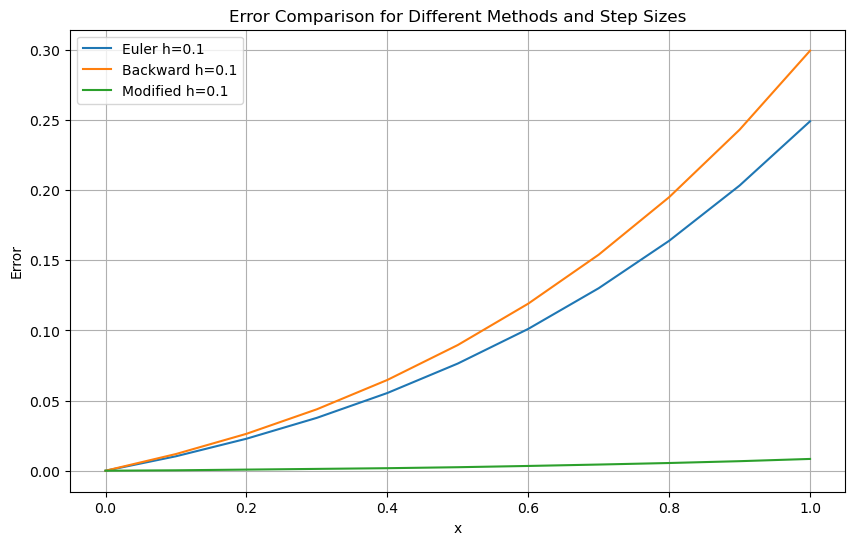

In [4]:
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt

def y_exact(x):
    return -x - 1 + 2 * np.exp(x)

def f(x, y):
    return x + y

def euler(h):
    x_vals = np.arange(0, 1 + h, h)
    y = 1
    results = []
    for x in x_vals:
        y_exact_val = y_exact(x)
        error = abs(y - y_exact_val)
        results.append([x, y, error, y_exact_val])
        y += h * f(x, y)
    return results

def backward_euler(h):
    x_vals = np.arange(0, 1 + h, h)
    y = 1
    results = []
    for x in x_vals:
        y_exact_val = y_exact(x)
        error = abs(y - y_exact_val)
        results.append([y, error])
        x_next = x + h
        y = (y + h * x_next) / (1 - h)
    return results

def modified_euler(h):
    x_vals = np.arange(0, 1 + h, h)
    y = 1
    results = []
    for x in x_vals:
        y_exact_val = y_exact(x)
        error = abs(y - y_exact_val)
        results.append([y, error])
        y_predict = y + h * f(x, y)
        y += h / 2 * (f(x, y) + f(x + h, y_predict))
    return results

h1, h2 = 0.1, 0.05

euler_01 = euler(h1)
backward_01 = backward_euler(h1)
modified_01 = modified_euler(h1)

euler_005 = euler(h2)
backward_005 = backward_euler(h2)
modified_005 = modified_euler(h2)

combined_01 = []
for i in range(len(euler_01)):
    x = euler_01[i][0]
    row = [
        x,
        round(euler_01[i][1], 4), round(euler_01[i][2], 4),
        round(backward_01[i][0], 4), round(backward_01[i][1], 4),
        round(modified_01[i][0], 4), round(modified_01[i][1], 4),
        round(euler_01[i][3], 4)]
    combined_01.append(row)
    
combined_005 = []
for i in range(len(euler_005)):
    x = euler_005[i][0]
    row = [
        x,
        round(euler_005[i][1], 4), round(euler_005[i][2], 4),
        round(backward_005[i][0], 4), round(backward_005[i][1], 4),
        round(modified_005[i][0], 4), round(modified_005[i][1], 4),
        round(euler_005[i][3], 4)]
    combined_005.append(row)
columns = [
    "x",
    "Euler y", "Euler Error",
    "Backward y", "Backward Error",
    "Modified y", "Modified Error",
    "Exact y"]

df_01 = pd.DataFrame(combined_01, columns=columns)
df_005 = pd.DataFrame(combined_005, columns=columns)

print("\nComparison of Euler, Backward Euler, and Modified Euler (h = 0.1):")
print(df_01.to_string(index=False))
print("\nComparison of Euler, Backward Euler, and Modified Euler (h = 0.05):")
print(df_005.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.plot(df_01["x"], df_01["Euler Error"], label="Euler h=0.1")
plt.plot(df_01["x"], df_01["Backward Error"], label="Backward h=0.1")
plt.plot(df_01["x"], df_01["Modified Error"], label="Modified h=0.1")
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error Comparison for Different Methods and Step Sizes")
plt.legend()
plt.grid(True)
plt.show()

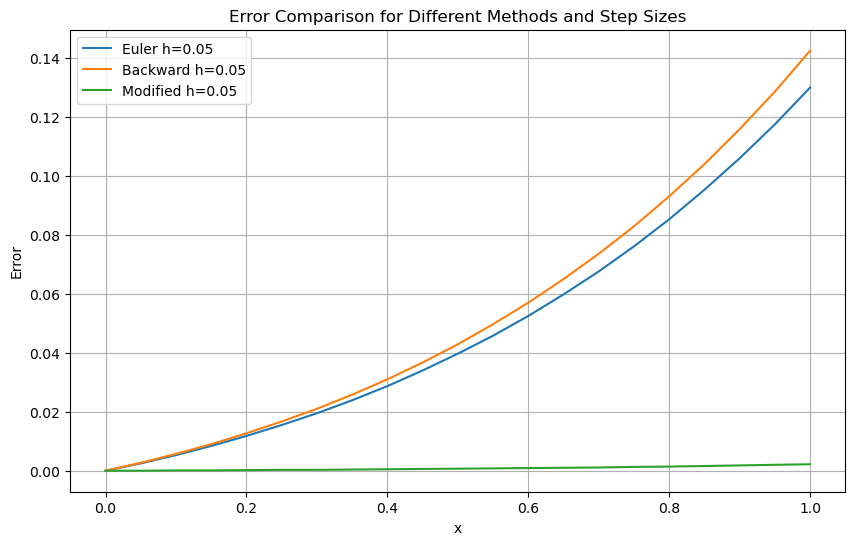

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df_005["x"], df_005["Euler Error"], label="Euler h=0.05")
plt.plot(df_005["x"], df_005["Backward Error"], label="Backward h=0.05")
plt.plot(df_005["x"], df_005["Modified Error"], label="Modified h=0.05")
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error Comparison for Different Methods and Step Sizes")
plt.legend()
plt.grid(True)
plt.show()


Comparison for dy/dx = xy + y^2 (h = 0.1):
  x  Euler y  Euler Err  Backward y  Backward Err  Modified y  Modified Err   Exact y
0.0  1.00000    0.00000     1.00000       0.00000     1.00000       0.00000   1.00000
0.1  1.10000    0.01689     0.92388       0.19300     1.11600       0.00089   1.11689
0.2  1.23200    0.04539     0.86618       0.41121     1.27471       0.00269   1.27739
0.3  1.40842    0.09570     0.82312       0.68101     1.49761       0.00651   1.50413
0.4  1.64904    0.18993     0.79207       1.04690     1.82364       0.01533   1.83897
0.5  1.98694    0.38188     0.77116       1.59766     2.33058       0.03823   2.36881
0.6  2.48107    0.82643     0.75908       2.54843     3.19722       0.11029   3.30751
0.7  3.24551    2.11422     0.75493       4.60479     4.93160       0.42812   5.35973
0.8  4.52603    8.48913     0.75811      12.25705     9.59995       3.41520  13.01516
0.9  6.93661   46.59468     0.76823      40.42631    34.64954      74.30762 -39.65808
1.0 12.372

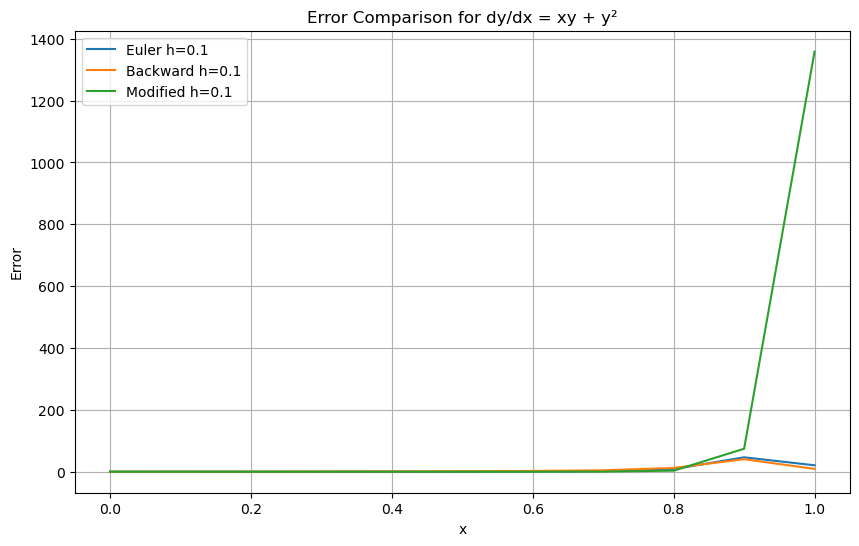

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

def y_exact(x):
    integral, _ = quad(lambda t: np.exp(t**2 / 2), 0, x)
    return np.exp(x**2 / 2) / (1 - integral)

def f(x, y):
    return x * y + y**2

def euler(h):
    x_vals = np.arange(0, 1 + h, h)
    y = 1
    results = []
    for x in x_vals:
        y_ex = y_exact(x)
        error = abs(y - y_ex)
        results.append([x, y, error, y_ex])
        y += h * f(x, y)
    return results

def backward_euler(h):
    x_vals = np.arange(0, 1 + h, h)
    y = 1
    results = []
    for x in x_vals:
        y_ex = y_exact(x)
        error = abs(y - y_ex)
        results.append([x, y, error, y_ex])
        x_next = x + h
        a = h
        b = 1 - h * x_next
        c = -y
        y = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    return results

def modified_euler(h):
    x_vals = np.arange(0, 1 + h, h)
    y = 1
    results = []
    for x in x_vals:
        y_ex = y_exact(x)
        error = abs(y - y_ex)
        results.append([x, y, error, y_ex])
        k1 = f(x, y)
        k2 = f(x + h, y + h * k1)
        y += h / 2 * (k1 + k2)
    return results

h1, h2 = 0.1, 0.05

euler_01 = euler(h1)
backward_01 = backward_euler(h1)
modified_01 = modified_euler(h1)

euler_005 = euler(h2)
backward_005 = backward_euler(h2)
modified_005 = modified_euler(h2)

def combine_table(eul, beul, meul):
    combined = []
    for i in range(len(eul)):
        x = eul[i][0]
        row = [
            x,
            round(eul[i][1], 5), round(eul[i][2], 5),
            round(beul[i][1], 5), round(beul[i][2], 5),
            round(meul[i][1], 5), round(meul[i][2], 5),
            round(eul[i][3], 5)
        ]
        combined.append(row)
    return pd.DataFrame(combined, columns=[
        "x",
        "Euler y", "Euler Err",
        "Backward y", "Backward Err",
        "Modified y", "Modified Err",
        "Exact y"
    ])

df_01 = combine_table(euler_01, backward_01, modified_01)
df_005 = combine_table(euler_005, backward_005, modified_005)

print("\nComparison for dy/dx = xy + y^2 (h = 0.1):")
print(df_01.to_string(index=False))
print("\nComparison for dy/dx = xy + y^2 (h = 0.05):")
print(df_005.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.plot(df_01["x"], df_01["Euler Err"], label="Euler h=0.1")
plt.plot(df_01["x"], df_01["Backward Err"], label="Backward h=0.1")
plt.plot(df_01["x"], df_01["Modified Err"], label="Modified h=0.1")
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error Comparison for dy/dx = xy + y²")
plt.legend()
plt.grid(True)
plt.show()

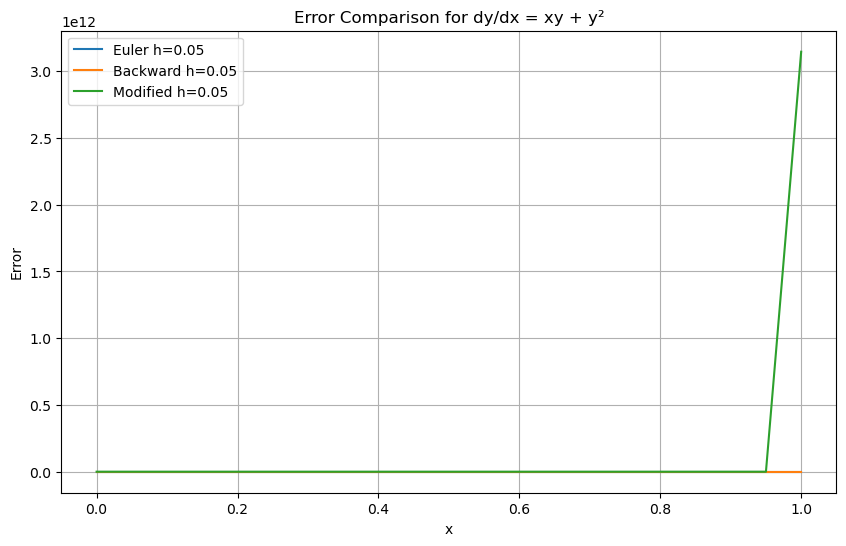

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df_005["x"], df_005["Euler Err"], label="Euler h=0.05")
plt.plot(df_005["x"], df_005["Backward Err"], label="Backward h=0.05")
plt.plot(df_005["x"], df_005["Modified Err"], label="Modified h=0.05")
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error Comparison for dy/dx = xy + y²")
plt.legend()
plt.grid(True)
plt.show()